In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv") # reading train data
df.head()

/tmp/ipykernel_18/2501619468.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv") # reading train data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Iniciando o tratamento dos dados

In [3]:
df.shape

(100000, 28)

In [4]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## Podemos eliminar algumas colunas que não são tão relevantes.

In [5]:
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [6]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,4,3,4,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,3,4,3,4,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,3,4,3,4,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
target_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(target_map)

In [8]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.0,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
8,28,,34847.84,2,4,6,1,3,4,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
10,28,Teacher,34847.84,2,1385,6,1,3,-1,2.0,,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,1
16,34,,143162.64,1,5,8,3,5,8,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,2
18,34,,143162.64,1,5,8,3,8,7,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000,HighspentSmallvaluepayments,715.741367403555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,28,,20002.88,10,8,29,5,33,25,9.0,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,1
99992,24,Mechanic,39628.99,4,6,7,2,23,NaN,3.0,,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,LowspentSmallvaluepayments,189.64108,0
99994,25,Mechanic,39628.99,4,6,7,2,20,6,3.0,,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,HighspentMediumvaluepayments,410.256158,0
99995,25,Mechanic,39628.99,4,6,7,2,23,7,3.0,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,HighspentLargevaluepayments,479.866228,0


In [9]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Vamos preencher os valores faltantes com NaN
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [10]:
df.isna().sum()

Age                             0
Occupation                   7062
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Temos muitos dados faltantes e errados para tratar.

### Age:

In [11]:
df['Age'] = pd.to_numeric(df['Age'])
df['Age'].dtype

dtype('int64')

<Axes: xlabel='Age'>

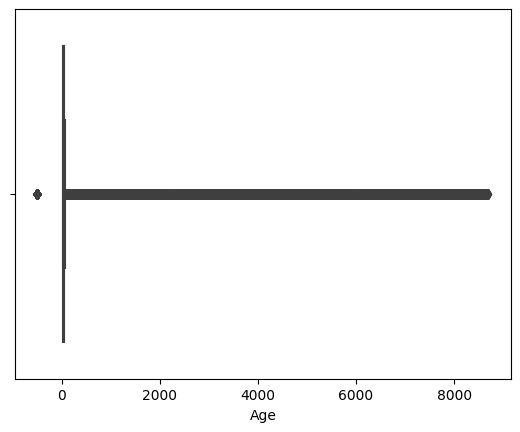

In [12]:
sns.boxplot(df,x = 'Age')

In [13]:
df[df['Age']<0]['Age'].unique()

array([-500])

In [14]:
df[df['Age']>100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342])

In [15]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)
df.shape

(97224, 20)

<Axes: xlabel='Age'>

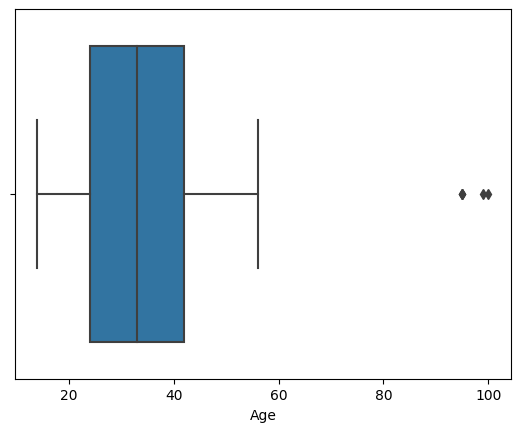

In [16]:
sns.boxplot(df,x = 'Age')

### Occupation

In [17]:
df.Occupation.isna().sum()

6873

In [18]:
df.loc[pd.isna(df['Occupation']),'Occupation']

8        NaN
16       NaN
18       NaN
20       NaN
29       NaN
        ... 
99912    NaN
99920    NaN
99935    NaN
99943    NaN
99989    NaN
Name: Occupation, Length: 6873, dtype: object

In [19]:
df.loc[pd.isna(df['Occupation']),'Occupation'] = 'Other'

In [20]:
df['Occupation'].isna().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Teacher'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Entrepreneur'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Lawyer'),
  Text(7, 0, 'MediaManager'),
  Text(8, 0, 'Doctor'),
  Text(9, 0, 'Journalist'),
  Text(10, 0, 'Manager'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Musician'),
  Text(13, 0, 'Mechanic'),
  Text(14, 0, 'Writer'),
  Text(15, 0, 'Architect')])

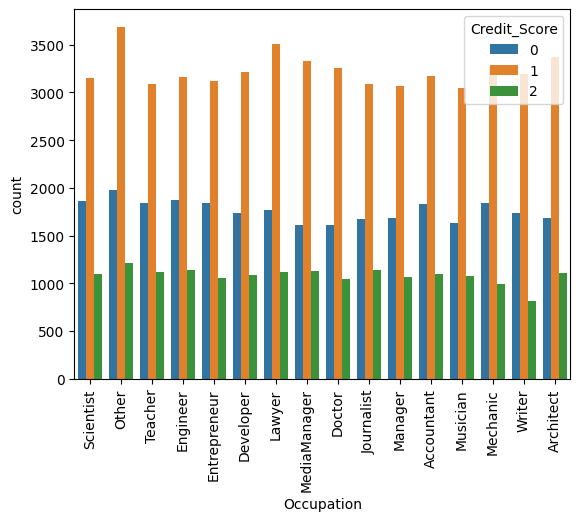

In [21]:
plt.figure()
sns.countplot(data = df, x = 'Occupation', hue = 'Credit_Score')
plt.xticks(rotation=90)

A profissão não parece ter muito a ver com o credit score.

### Num Bank Accounts

In [22]:
df[df['Num_Bank_Accounts']<0]['Num_Bank_Accounts'].count()

21

In [23]:
df.drop(df[df['Num_Bank_Accounts']<0].index, inplace=True)

### Num_of_Loan

In [24]:
df.dtypes

Age                           int64
Occupation                   object
Annual_Income                object
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                  int64
dtype: object

In [25]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])

In [26]:
df[df['Num_of_Loan']<0]['Num_of_Loan'].unique()

array([-100])

In [27]:
df.drop(df[df['Num_of_Loan']<0].index, inplace=True)

### Delay_from_due_date 

In [28]:
df[df['Delay_from_due_date']<0]['Delay_from_due_date'].unique()

array([-1, -2, -3, -5, -4])

In [29]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)

### Num_of_Delayed_Payment

In [30]:
df['Num_of_Delayed_Payment'].isna().sum()

6490

In [31]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [32]:
df.drop(df[df['Num_of_Delayed_Payment']<0].index, inplace=True)

In [33]:
df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_18/542884467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/542884467.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)


In [34]:
df.shape

(92294, 20)

### Num_Credit_Inquiries

In [35]:
df[df['Num_Credit_Inquiries']<0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

In [36]:
df['Num_Credit_Inquiries'].isna().sum()

1810

In [37]:
df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_18/2617674282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/2617674282.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)


### Credit_Mix

In [38]:
df['Credit_Mix'].isna().sum()

18667

In [39]:
df['Credit_Mix'].fillna('Unknown', inplace = True)

/tmp/ipykernel_18/1885168426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].fillna('Unknown', inplace = True)


In [40]:
df['Credit_History_Age'].isna().sum()

8356

In [41]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

In [42]:
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

/tmp/ipykernel_18/1095117967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [43]:
df['Credit_History_Age'].isna().sum()

0

In [44]:
# Vamos extrair os anos e meses da coluna
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.0,4.0,...,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2,22,1
3,23,Scientist,19114.12,3,4,3,4,5,4.0,4.0,...,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2,22,4
4,23,Scientist,19114.12,3,4,3,4,6,4.0,4.0,...,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2,22,5
5,23,Scientist,19114.12,3,4,3,4,8,4.0,4.0,...,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,2,22,6
6,23,Scientist,19114.12,3,4,3,4,3,8.0,4.0,...,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2,22,7


In [45]:
# Convertemos anos pra meses e pegamos o total de meses
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.0,4.0,Unknown,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2,265
3,23,Scientist,19114.12,3,4,3,4,5,4.0,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2,268
4,23,Scientist,19114.12,3,4,3,4,6,4.0,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2,269
5,23,Scientist,19114.12,3,4,3,4,8,4.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,2,270
6,23,Scientist,19114.12,3,4,3,4,3,8.0,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2,271


### Payment_of_Min_Amount

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

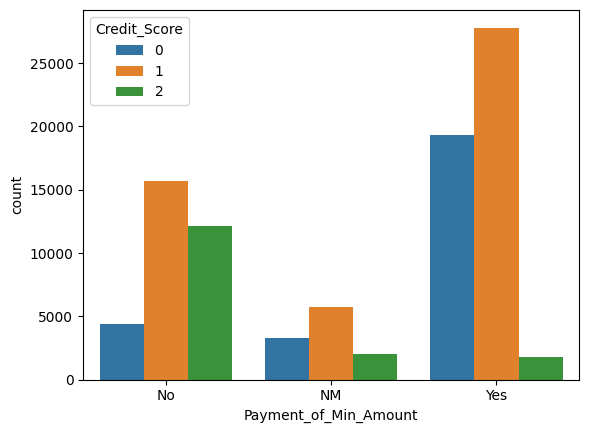

In [46]:
plt.figure()
sns.countplot(data=df,x='Payment_of_Min_Amount',hue='Credit_Score')

### Amount_invested_monthly

In [47]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])
df[df['Amount_invested_monthly']<0]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months


In [48]:
df['Amount_invested_monthly'].isna().sum()

4128

In [49]:
df['Amount_invested_monthly'].fillna(method='ffill',inplace=True)

/tmp/ipykernel_18/4158739745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_invested_monthly'].fillna(method='ffill',inplace=True)
/tmp/ipykernel_18/4158739745.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Amount_invested_monthly'].fillna(method='ffill',inplace=True)


In [50]:
df['Amount_invested_monthly'].isna().sum()

0

### Payment_Behaviour

In [51]:
df['Payment_Behaviour']

0         HighspentSmallvaluepayments
3          LowspentSmallvaluepayments
4        HighspentMediumvaluepayments
5                              !@9#%8
6          LowspentSmallvaluepayments
                     ...             
99995     HighspentLargevaluepayments
99996    HighspentMediumvaluepayments
99997     HighspentLargevaluepayments
99998      LowspentLargevaluepayments
99999                          !@9#%8
Name: Payment_Behaviour, Length: 92294, dtype: object

In [52]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      23661
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
!@9#%8                           6994
Name: count, dtype: int64

In [53]:
df[df['Payment_Behaviour']=='!@9#%8']['Payment_Behaviour'] = np.nan

/tmp/ipykernel_18/2321488809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Payment_Behaviour']=='!@9#%8']['Payment_Behaviour'] = np.nan


In [54]:
df['Payment_Behaviour'].isna().sum()

0

In [55]:
df['Payment_Behaviour'].fillna(method='ffill',inplace=True)

/tmp/ipykernel_18/3583474080.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Payment_Behaviour'].fillna(method='ffill',inplace=True)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'HighspentSmallvaluepayments'),
  Text(1, 0, 'LowspentSmallvaluepayments'),
  Text(2, 0, 'HighspentMediumvaluepayments'),
  Text(3, 0, '!@9#%8'),
  Text(4, 0, 'HighspentLargevaluepayments'),
  Text(5, 0, 'LowspentMediumvaluepayments'),
  Text(6, 0, 'LowspentLargevaluepayments')])

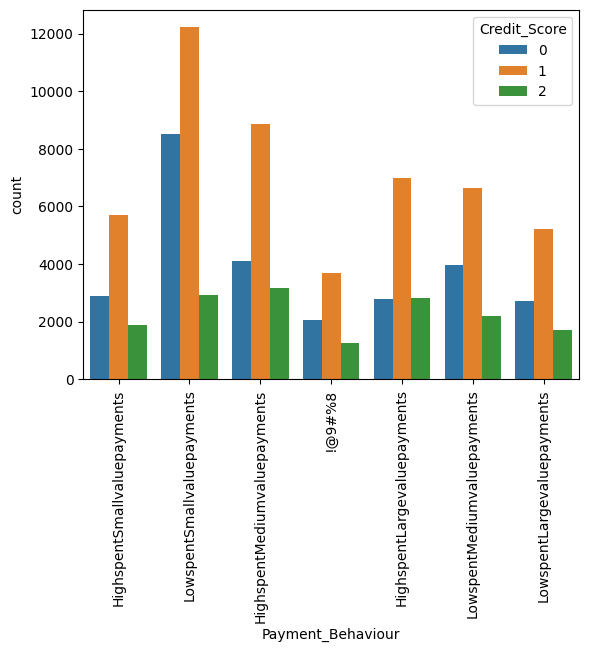

In [56]:
plt.figure()
sns.countplot(data=df,
             x = 'Payment_Behaviour',
             hue='Credit_Score')
plt.xticks(rotation=90)

### Monthly_Balance

In [57]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance']<0]['Monthly_Balance'].count()

9

In [58]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [59]:
df['Monthly_Balance'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_18/2255816643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Balance'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/2255816643.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Balance'].fillna(method='ffill', inplace=True)


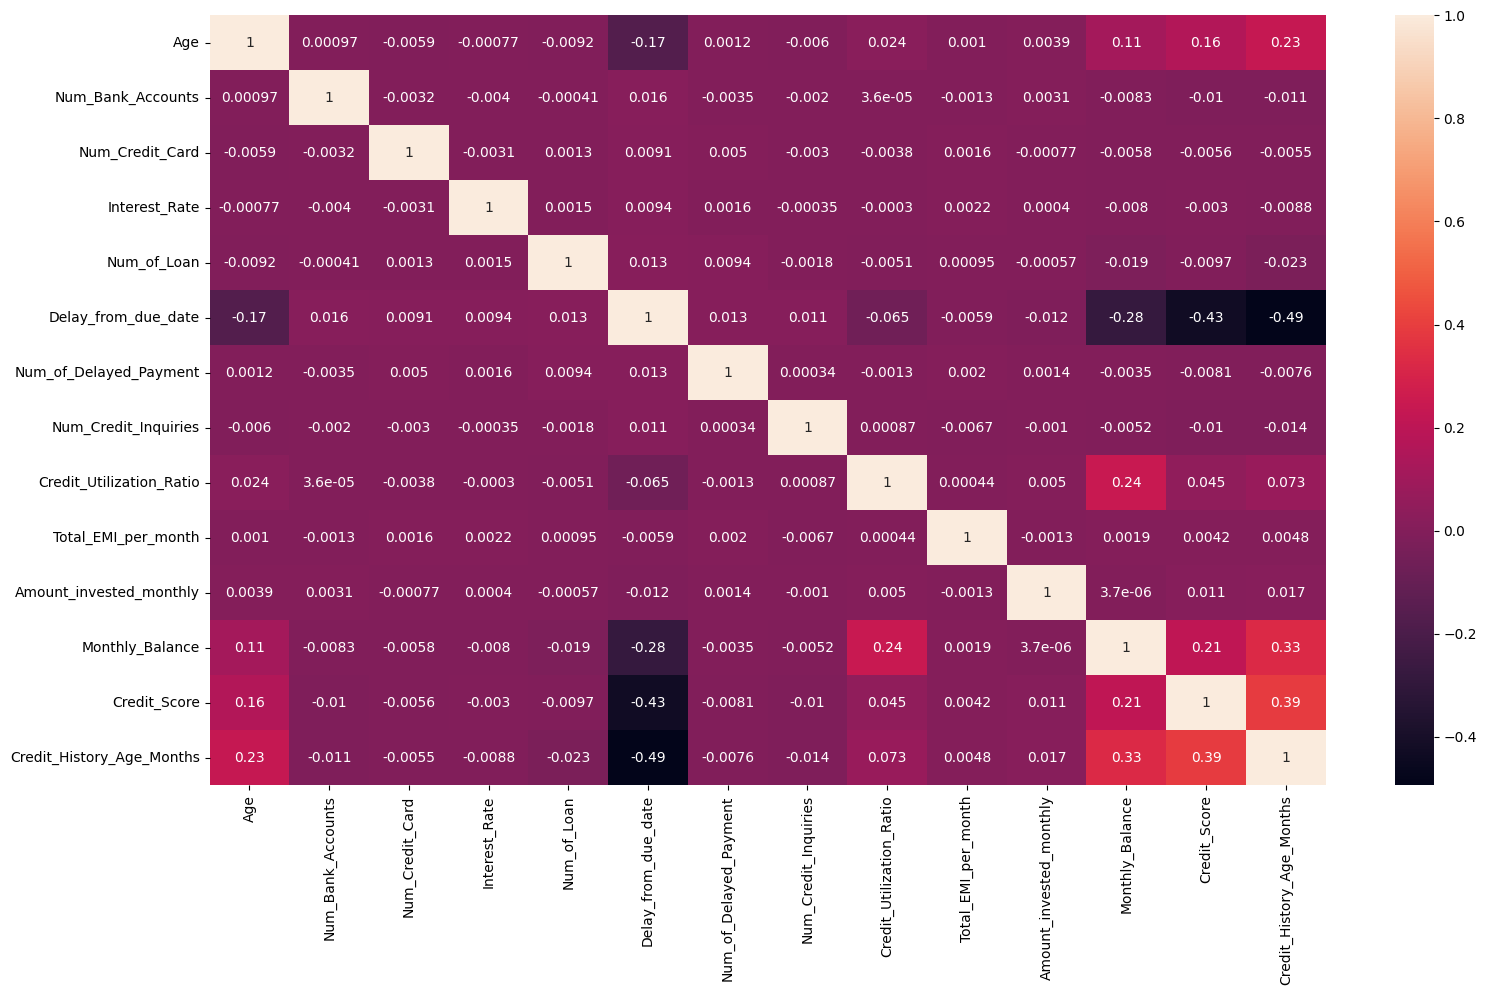

In [60]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

In [61]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                 object
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                   int64
Credit_History_Age_Months      int64
dtype: object

In [62]:
categorical_columns = ['Occupation', 'Annual_Income', 'Credit_Mix', 
                      'Outstanding_Debt', 'Payment_of_Min_Amount',
                      'Payment_Behaviour']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df[categorical_columns]

,Occupation,Annual_Income,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour
0,13,4310,3,11165,1,3
3,13,4310,1,11165,1,6
4,13,4310,1,11165,1,2
5,13,4310,1,11165,1,0
6,13,4310,1,11165,1,6
...,...,...,...,...,...,...
99995,9,8175,3,9395,1,1
99996,9,8175,3,9395,1,2
99997,9,8175,1,9395,1,1
99998,9,8175,1,9395,1,4


# Vamos avaliar se tem linhas duplicadas

In [63]:
df.duplicated().sum()

0

# Vamos avaliar quais variáveis vão entrar nos modelos de Machine Learning

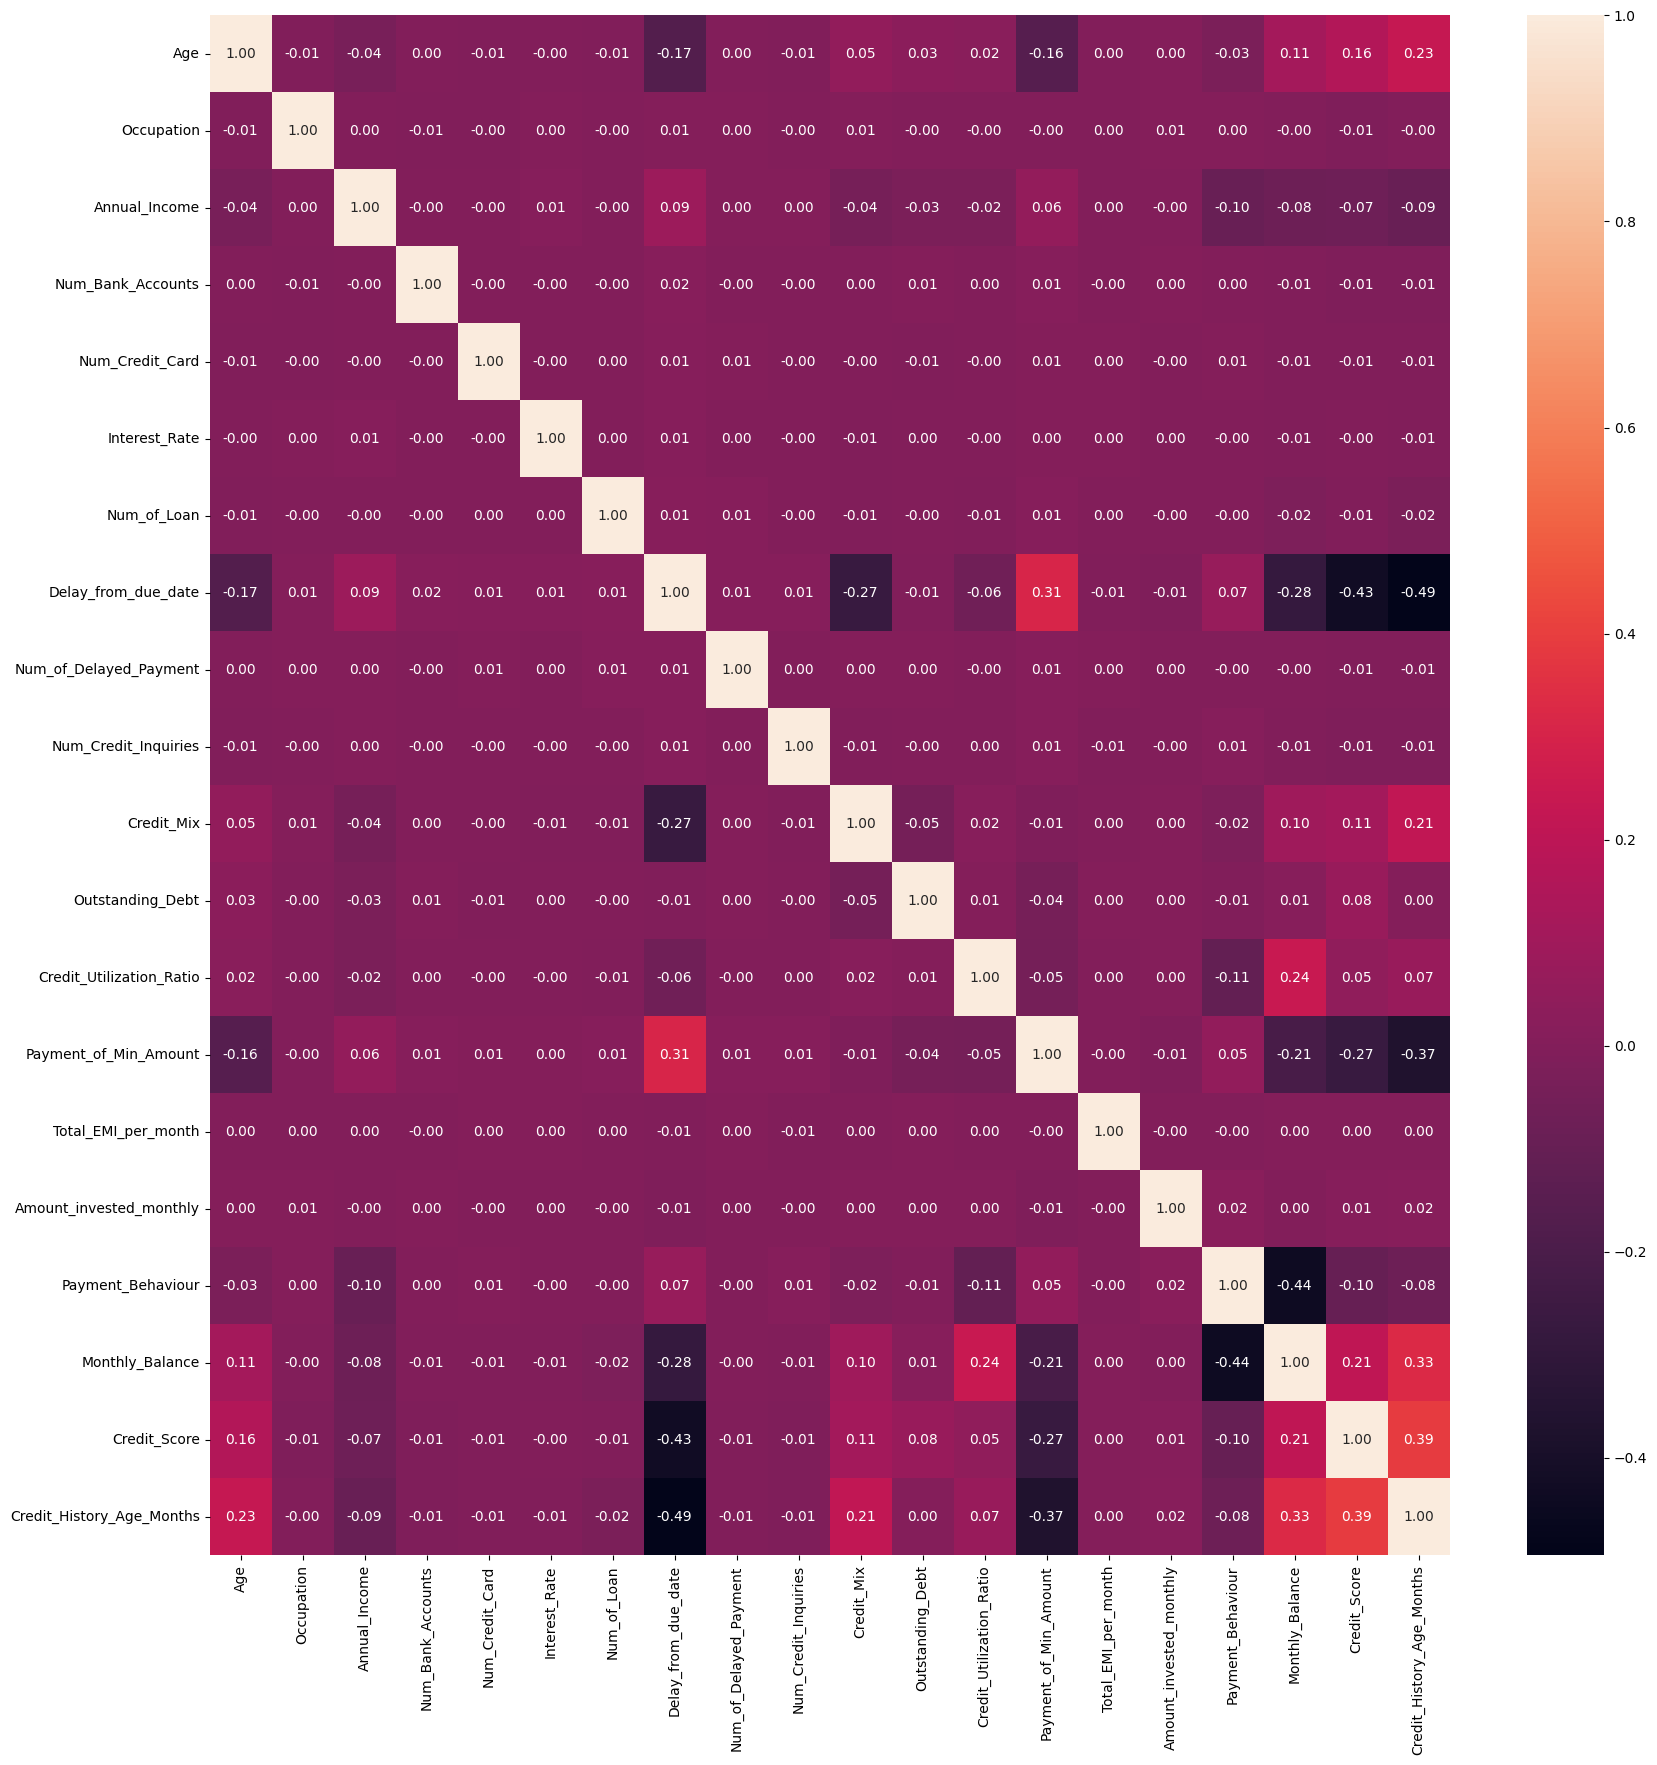

In [64]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt='.2f')
plt.show()

Vemos que Delay_from_due_date, Age, Credit_Mix, Payment_of_Min_Amount, Monthly_Balance e Credit_History_Age_Months têm módulos de correlação com Credit_Score maior que os outros features. Então, serão essas variáveis utilizadas em nossos modelos de Machine Learning.

In [65]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42,shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42,shuffle=True)
print("Shape of Train_df:", train_df.shape)
print("Shape of Val_df:", val_df.shape)
print("Shape of Test_df:", test_df.shape)

X_train = train_df[['Age','Delay_from_due_date', 'Monthly_Balance',
                    'Credit_Mix', 'Credit_History_Age_Months',
               'Payment_of_Min_Amount']]
y_train = train_df['Credit_Score']

X_val = val_df[['Age','Delay_from_due_date', 'Monthly_Balance',
                    'Credit_Mix', 'Credit_History_Age_Months',
               'Payment_of_Min_Amount']]
y_val = val_df['Credit_Score']

X_test = test_df[['Age','Delay_from_due_date', 'Monthly_Balance',
                    'Credit_Mix', 'Credit_History_Age_Months',
               'Payment_of_Min_Amount']]
y_test = test_df['Credit_Score']

# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of Train_df: (46142, 20)
Shape of Val_df: (23071, 20)
Shape of Test_df: (23072, 20)
Shape of X_train: (46142, 6)
Shape of y_train: (46142,)
Shape of X_val: (23071, 6)
Shape of y_val: (23071,)
Shape of X_test: (23072, 6)
Shape of y_test: (23072,)


# Random Forest

In [66]:
n = [100,200]
depth = [5,10]
samples = [1,2]

d = ['n_estimators', 'max_depth', 'min_samples_leaf', 'accuracy_valid', 'accuracy_test']
best = pd.DataFrame(columns=d)
best

,n_estimators,max_depth,min_samples_leaf,accuracy_valid,accuracy_test


In [67]:
for i in n:
    for d in depth:
        for s in samples:
            clf = RandomForestClassifier(n_estimators = i,
                                         max_depth = d,
                                         min_samples_leaf = s,
                                         random_state=42)
            clf.fit(X_train,y_train)
            val_pred = clf.predict(X_val)
            test_pred = clf.predict(X_test)
            best.loc[len(best.index)] = [i,d,s,accuracy_score(y_val,val_pred), 
                                        accuracy_score(y_test,test_pred)]

In [68]:
best

,n_estimators,max_depth,min_samples_leaf,accuracy_valid,accuracy_test
0,100.0,5.0,1.0,0.635083,0.631501
1,100.0,5.0,2.0,0.635083,0.631025
2,100.0,10.0,1.0,0.645096,0.643811
3,100.0,10.0,2.0,0.643492,0.643074
4,200.0,5.0,1.0,0.632266,0.629421
5,200.0,5.0,2.0,0.632786,0.629464
6,200.0,10.0,1.0,0.645009,0.643811
7,200.0,10.0,2.0,0.644272,0.643161


## E se adicionarmos mais variáveis?

In [69]:
X_train = train_df[['Age','Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 
                    'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 
                    'Num_of_Delayed_Payment','Num_Credit_Inquiries', 
                    'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 
                    'Credit_History_Age_Months', 'Monthly_Balance',
                   'Payment_of_Min_Amount']]
y_train = train_df['Credit_Score']

X_val = val_df[['Age','Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 
                    'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 
                    'Num_of_Delayed_Payment','Num_Credit_Inquiries', 
                    'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 
                    'Credit_History_Age_Months', 'Monthly_Balance',
                   'Payment_of_Min_Amount']]
y_val = val_df['Credit_Score']

X_test = test_df[['Age','Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 
                    'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 
                    'Num_of_Delayed_Payment','Num_Credit_Inquiries', 
                    'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 
                    'Credit_History_Age_Months', 'Monthly_Balance',
                   'Payment_of_Min_Amount']]
y_test = test_df['Credit_Score']


print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (46142, 15)
Shape of y_train: (46142,)
Shape of X_val: (23071, 15)
Shape of y_val: (23071,)
Shape of X_test: (23072, 15)
Shape of y_test: (23072,)


In [70]:
n = [100,200]
depth = [5,10]
samples = [1,2]

d = ['n_estimators', 'max_depth', 'min_samples_leaf', 'accuracy_valid', 'accuracy_test']
best = pd.DataFrame(columns=d)
best

,n_estimators,max_depth,min_samples_leaf,accuracy_valid,accuracy_test


In [71]:
for i in n:
    for d in depth:
        for s in samples:
            clf = RandomForestClassifier(n_estimators = i,
                                         max_depth = d,
                                         min_samples_leaf = s,
                                         random_state=42)
            clf.fit(X_train,y_train)
            val_pred = clf.predict(X_val)
            test_pred = clf.predict(X_test)
            best.loc[len(best.index)] = [i,d,s,accuracy_score(y_val,val_pred), 
                                        accuracy_score(y_test,test_pred)]

In [72]:
best

,n_estimators,max_depth,min_samples_leaf,accuracy_valid,accuracy_test
0,100.0,5.0,1.0,0.659703,0.652566
1,100.0,5.0,2.0,0.659443,0.652783
2,100.0,10.0,1.0,0.710979,0.707784
3,100.0,10.0,2.0,0.710979,0.705964
4,200.0,5.0,1.0,0.659963,0.654733
5,200.0,5.0,2.0,0.659529,0.654473
6,200.0,10.0,1.0,0.712583,0.707221
7,200.0,10.0,2.0,0.713450,0.706961


Vemos que os melhores parâmetros foram: n_estimators = 200, max_depth = 10, min_samples_leaf = 1.

Note também que, ao aumentarmos n_estimators e fixarmos max_depth = 10 e min_samples_leaf = 1, os resultados estão tendendo a uma melhora. Vamos então fazer mais testes.

In [73]:
n = [300,400,500]

for i in n:
    clf = RandomForestClassifier(n_estimators = i,
                                 max_depth = d,
                                 min_samples_leaf = s,
                                 random_state=42)
    clf.fit(X_train,y_train)
    val_pred = clf.predict(X_val)
    test_pred = clf.predict(X_test)
    best.loc[len(best.index)] = [i,10,1,accuracy_score(y_val,val_pred), 
                                accuracy_score(y_test,test_pred)]

In [74]:
best

,n_estimators,max_depth,min_samples_leaf,accuracy_valid,accuracy_test
0,100.0,5.0,1.0,0.659703,0.652566
1,100.0,5.0,2.0,0.659443,0.652783
2,100.0,10.0,1.0,0.710979,0.707784
3,100.0,10.0,2.0,0.710979,0.705964
4,200.0,5.0,1.0,0.659963,0.654733
5,200.0,5.0,2.0,0.659529,0.654473
6,200.0,10.0,1.0,0.712583,0.707221
7,200.0,10.0,2.0,0.713450,0.706961
8,300.0,10.0,1.0,0.713580,0.707524
9,400.0,10.0,1.0,0.713363,0.707871


De fato há uma melhora, mas não muito significativa.

Para os testes com Gradient Boosting, vamos manter as features que adicionamos.

# Gradient Boosting Classifier

In [75]:
n = [100,200,300]
learning = [0.1,0.01]

d = ['n_estimators', 'learning_rate', 'accuracy_valid', 'accuracy_test']
best = pd.DataFrame(columns=d)
best

,n_estimators,learning_rate,accuracy_valid,accuracy_test


In [76]:
for i in n:
    for d in learning:
        clf = GradientBoostingClassifier(n_estimators = i,
                                         learning_rate = d,
                                         random_state=42)
        clf.fit(X_train,y_train)
        val_pred = clf.predict(X_val)
        test_pred = clf.predict(X_test)
        best.loc[len(best.index)] = [i,d,accuracy_score(y_val,val_pred), 
                                    accuracy_score(y_test,test_pred)]

In [77]:
best

,n_estimators,learning_rate,accuracy_valid,accuracy_test
0,100.0,0.10,0.698669,0.693871
1,100.0,0.01,0.649863,0.646238
2,200.0,0.10,0.704694,0.699376
3,200.0,0.01,0.679121,0.671940
4,300.0,0.10,0.709245,0.704404
5,300.0,0.01,0.684452,0.676404


Os resultados com n_estimators crescendo e learning_rate = 0.1 vêm crescendo, então vamos fazer mais testes.

In [78]:
n = [400,500,600]

for i in n:
    clf = GradientBoostingClassifier(n_estimators = i,
                                         learning_rate = 0.1,
                                         random_state=42)
    clf.fit(X_train,y_train)
    val_pred = clf.predict(X_val)
    test_pred = clf.predict(X_test)
    best.loc[len(best.index)] = [i,0.1,accuracy_score(y_val,val_pred), 
                                accuracy_score(y_test,test_pred)]

In [79]:
best

,n_estimators,learning_rate,accuracy_valid,accuracy_test
0,100.0,0.10,0.698669,0.693871
1,100.0,0.01,0.649863,0.646238
2,200.0,0.10,0.704694,0.699376
3,200.0,0.01,0.679121,0.671940
4,300.0,0.10,0.709245,0.704404
5,300.0,0.01,0.684452,0.676404
6,400.0,0.10,0.711283,0.707784
7,500.0,0.10,0.713797,0.711685
8,600.0,0.10,0.717264,0.714806


De fato, ao aumentarmos o n_estimators, o resultado melhorou. Será que ao fazermos uma cross-validation, podemos melhorar o resultado sem aumentar o n_estimators? Veremos.

# Random Forest com CV

In [80]:
params = {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [5,10,15],
    'min_samples_leaf' : [1,2]
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200, 300, 400]})

In [81]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 400}

In [82]:
best = grid.best_estimator_
val_pred = best.predict(X_val)
test_pred = best.predict(X_test)

print('Acurácia na validação: {}\nAcurácia no teste: {}', 
      accuracy_score(y_val,val_pred), accuracy_score(y_test,test_pred))

Acurácia na validação: {}
Acurácia no teste: {} 0.7440076286246803 0.7403346047156727


Os resultados realmente tiveram uma melhora com o cross-validation.

Vamos ver no caso do Gradient Boosting.

# Gradient Boosting com CV

In [83]:
params = {
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.1,0.01,0.001]
}

clf = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 200, 300, 400]})

In [84]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

In [85]:
best = grid.best_estimator_
val_pred = best.predict(X_val)
test_pred = best.predict(X_test)

print('Acurácia na validação: {}\nAcurácia no teste: {}', 
      accuracy_score(y_val,val_pred), accuracy_score(y_test,test_pred))

Acurácia na validação: {}
Acurácia no teste: {} 0.7112825625243813 0.7077843273231623


No caso do Gradient Boosting, não houve melhora com o cross-validation.